In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_frame = pd.read_csv("COVID-19-time-series-clean-complete.csv")
data_frame.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0


#### YearMonth

In [3]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'])
data_frame['YearMonth'] = data_frame['Date'].map(lambda date : 100 * date.year + date.month)
data_frame.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0,202001
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0,202001
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0,202001
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0,202001
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0,202001


#### April month

In [4]:
april_month_data = data_frame.query("YearMonth == 202004").reset_index(drop=True)
april_month_data.head(8)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
0,13510,2020-04-01,Afghanistan,197,4,5.0,188.0,22,0,0,202004
1,13511,2020-04-01,Albania,259,15,67.0,177.0,16,0,15,202004
2,13512,2020-04-01,Algeria,847,58,61.0,728.0,131,14,15,202004
3,13513,2020-04-01,Andorra,390,14,10.0,366.0,14,2,0,202004
4,13514,2020-04-01,Angola,8,2,1.0,5.0,1,0,0,202004
5,13515,2020-04-01,Antigua and Barbuda,7,0,0.0,7.0,0,0,0,202004
6,13516,2020-04-01,Argentina,1054,28,248.0,778.0,0,1,8,202004
7,13517,2020-04-01,Armenia,571,4,31.0,536.0,39,1,1,202004


#### total_Confirmed

In [5]:
total_Confirmed = april_month_data.groupby('Country/Region')['Confirmed'].sum().reset_index()
total_Confirmed.head(8)

,Country/Region,Confirmed
0,Afghanistan,27074
1,Albania,15632
2,Algeria,69497
3,Andorra,19106
4,Angola,601
5,Antigua and Barbuda,617
6,Argentina,77576
7,Armenia,36511


In [11]:
sorted_total_Confirmed = total_Confirmed.sort_values(by=['Confirmed'], ascending=False)
sorted_total_Confirmed.head(8)

,Country/Region,Confirmed
179,US,19960815
162,Spain,5236777
84,Italy,4928524
65,Germany,3942925
61,France,3456319
183,United Kingdom,3328344
36,China,2500143
80,Iran,2255837


### death rate, number of patients in Iran

In [7]:
iran = data_frame.loc[(data_frame['Country/Region'] == 'Iran')]
iran.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,YearMonth
80,80,2020-01-22,Iran,0,0,0.0,0.0,0,0,0,202001
273,273,2020-01-23,Iran,0,0,0.0,0.0,0,0,0,202001
466,466,2020-01-24,Iran,0,0,0.0,0.0,0,0,0,202001
659,659,2020-01-25,Iran,0,0,0.0,0.0,0,0,0,202001
852,852,2020-01-26,Iran,0,0,0.0,0.0,0,0,0,202001


<AxesSubplot:xlabel='days'>

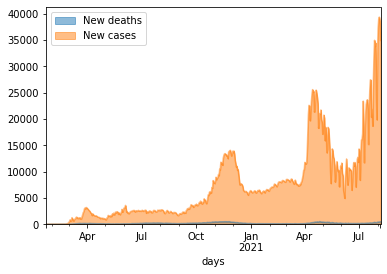

In [9]:
iran_covid19_datafreme = pd.DataFrame({'days' : iran['Date'], 'New deaths' : iran['New deaths'], 'New cases' : iran['New cases']})
# plt.figure(figsize = (24, 8))
iran_covid19_datafreme.plot.area(x='days', stacked=False)